<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 167.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 140.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 156.1 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


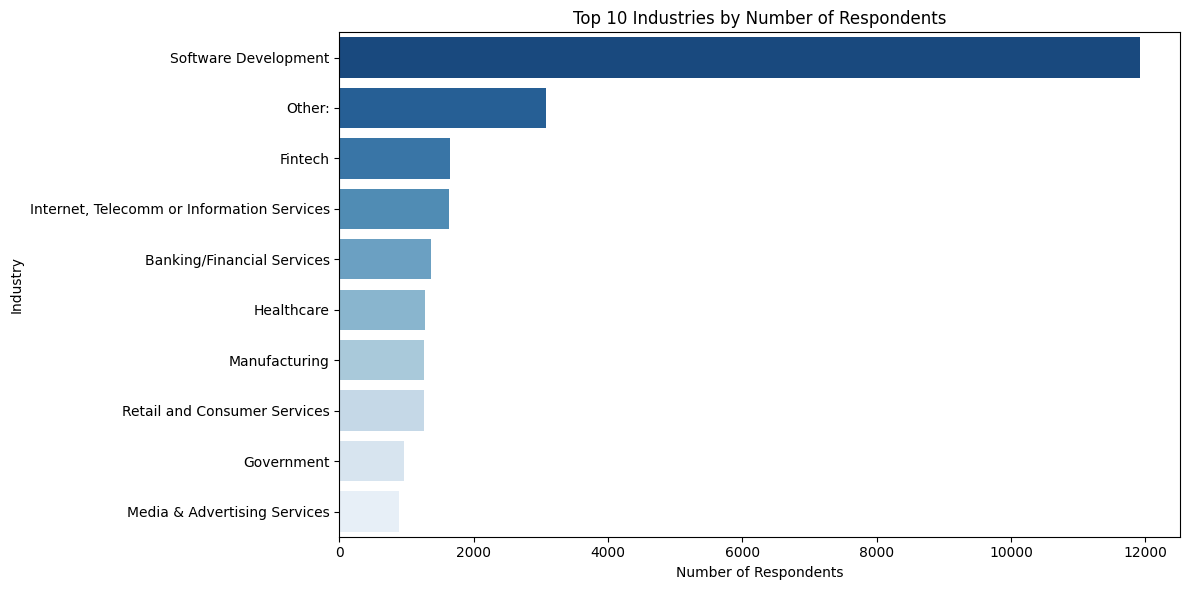

In [4]:
df["Industry"].value_counts().head(10)
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 industries
industry_counts = df["Industry"].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=industry_counts.values,
    y=industry_counts.index,
    hue=industry_counts.index,   # assign hue
    palette="Blues_r",
    legend=False                 # avoid duplicate legend
)

plt.title("Top 10 Industries by Number of Respondents")
plt.xlabel("Number of Respondents")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()



<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


Compensation Statistics
Mean   : 86,155.29
Median : 65,000.00
Std Dev: 186,756.97

Extreme Compensation Threshold (Mean + 3σ): 646,426.21

Number of extreme earners: 89
Percentage of respondents: 0.38%


,ConvertedCompYearly,Employment,EdLevel,YearsCodePro
15837,16256603.0,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
12723,13818022.0,"Employed, full-time;Independent contractor, fr...","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",10
28379,9000000.0,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",7
17593,6340564.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
17672,4936778.0,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",11
19267,3367716.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7
23694,2584118.0,"Employed, full-time;Independent contractor, fr...","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5
33720,2237846.0,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
34523,2153432.0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2
13763,2048046.0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12


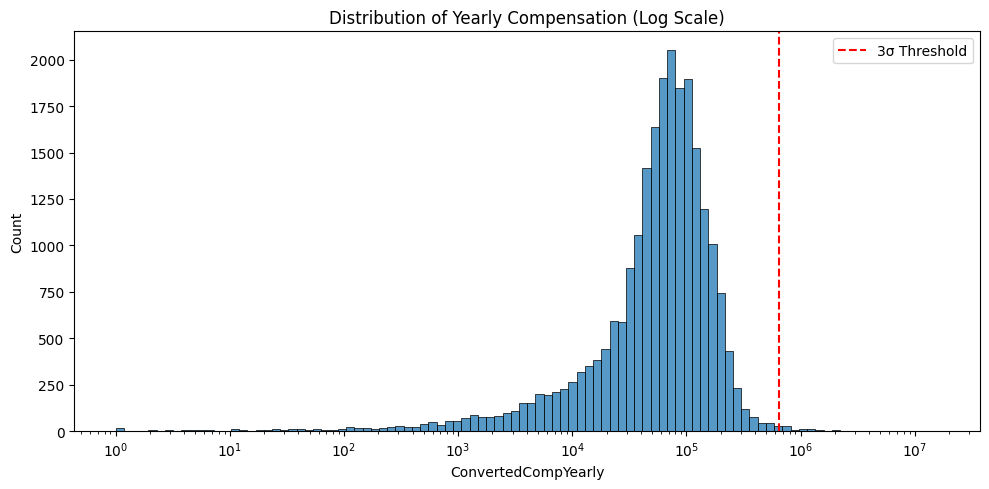

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Ensure compensation is numeric and clean
# -----------------------------
df["ConvertedCompYearly"] = pd.to_numeric(
    df["ConvertedCompYearly"],
    errors="coerce"
)

# Keep only valid positive compensation values
comp_df = df[df["ConvertedCompYearly"] > 0].copy()

# -----------------------------
# 2. Calculate basic statistics
# -----------------------------
mean_comp = comp_df["ConvertedCompYearly"].mean()
median_comp = comp_df["ConvertedCompYearly"].median()
std_comp = comp_df["ConvertedCompYearly"].std()

print("Compensation Statistics")
print(f"Mean   : {mean_comp:,.2f}")
print(f"Median : {median_comp:,.2f}")
print(f"Std Dev: {std_comp:,.2f}")

# -----------------------------
# 3. Define extreme compensation threshold (3σ rule)
# -----------------------------
upper_threshold = mean_comp + 3 * std_comp

print(f"\nExtreme Compensation Threshold (Mean + 3σ): {upper_threshold:,.2f}")

# -----------------------------
# 4. Identify extremely high earners
# -----------------------------
high_earners = comp_df[
    comp_df["ConvertedCompYearly"] > upper_threshold
]

print(f"\nNumber of extreme earners: {len(high_earners)}")
print(
    f"Percentage of respondents: "
    f"{(len(high_earners) / len(comp_df)) * 100:.2f}%"
)

# Display top extreme earners
high_earners_sorted = high_earners.sort_values(
    by="ConvertedCompYearly",
    ascending=False
)

display(
    high_earners_sorted[
        ["ConvertedCompYearly", "Employment", "EdLevel", "YearsCodePro"]
    ].head(10)
)

# -----------------------------
# 5. Visualization (log scale)
# -----------------------------
plt.figure(figsize=(10, 5))

sns.histplot(
    comp_df["ConvertedCompYearly"],
    bins=100,
    log_scale=True
)

plt.axvline(
    upper_threshold,
    color="red",
    linestyle="--",
    label="3σ Threshold"
)

plt.title("Distribution of Yearly Compensation (Log Scale)")
plt.xlabel("ConvertedCompYearly")
plt.legend()
plt.tight_layout()
plt.show()


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Quartiles & IQR
Q1: 32,712.00
Q3: 107,971.50
IQR: 75,259.50

Outlier Bounds
Lower bound: -80,177.25
Upper bound: 220,860.75

Number of outliers: 978
Percentage of respondents: 4.17%

Top Outliers:


,ConvertedCompYearly,Employment,EdLevel,YearsCodePro
15837,16256603.0,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
12723,13818022.0,"Employed, full-time;Independent contractor, fr...","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",10
28379,9000000.0,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",7
17593,6340564.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13
17672,4936778.0,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",11
19267,3367716.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7
23694,2584118.0,"Employed, full-time;Independent contractor, fr...","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",5
33720,2237846.0,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
34523,2153432.0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2
13763,2048046.0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12


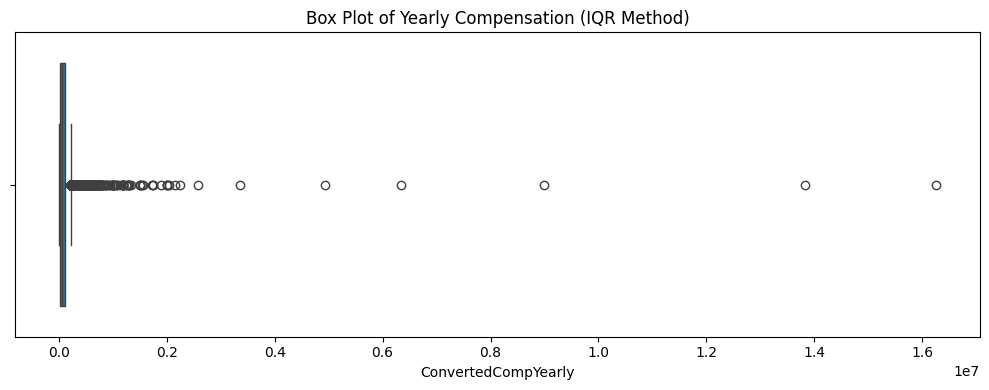

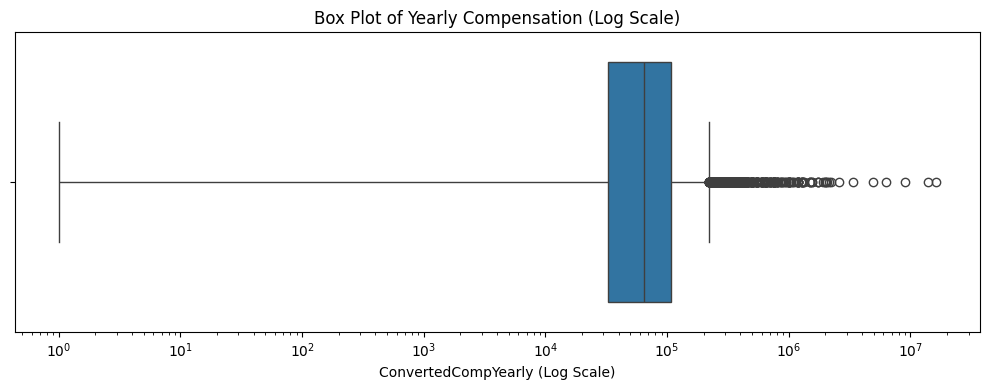


Outlier flag column added: 'Compensation_Outlier_IQR'


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Ensure ConvertedCompYearly is numeric and clean
# -----------------------------
df["ConvertedCompYearly"] = pd.to_numeric(
    df["ConvertedCompYearly"],
    errors="coerce"
)

# Keep only positive, valid compensation values
comp_df = df[df["ConvertedCompYearly"] > 0].copy()

# -----------------------------
# 2. Calculate Quartiles and IQR
# -----------------------------
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

print("Quartiles & IQR")
print(f"Q1: {Q1:,.2f}")
print(f"Q3: {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")

# -----------------------------
# 3. Determine Outlier Bounds
# -----------------------------
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutlier Bounds")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")

# -----------------------------
# 4. Identify Outliers
# -----------------------------
outliers = comp_df[
    (comp_df["ConvertedCompYearly"] < lower_bound) |
    (comp_df["ConvertedCompYearly"] > upper_bound)
]

print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of respondents: {(len(outliers) / len(comp_df)) * 100:.2f}%")

# Top outliers
print("\nTop Outliers:")
display(
    outliers.sort_values(
        by="ConvertedCompYearly",
        ascending=False
    )[["ConvertedCompYearly", "Employment", "EdLevel", "YearsCodePro"]].head(10)
)

# -----------------------------
# 5. Visualize Outliers using Box Plot
# -----------------------------
plt.figure(figsize=(10, 4))
sns.boxplot(x=comp_df["ConvertedCompYearly"])
plt.title("Box Plot of Yearly Compensation (IQR Method)")
plt.xlabel("ConvertedCompYearly")
plt.tight_layout()
plt.show()

# Box plot on log scale for better visualization of skew
plt.figure(figsize=(10, 4))
sns.boxplot(x=comp_df["ConvertedCompYearly"])
plt.xscale("log")
plt.title("Box Plot of Yearly Compensation (Log Scale)")
plt.xlabel("ConvertedCompYearly (Log Scale)")
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Optional: Flag Outliers in Original Dataset
# -----------------------------
df["Compensation_Outlier_IQR"] = (
    (df["ConvertedCompYearly"] < lower_bound) |
    (df["ConvertedCompYearly"] > upper_bound)
)

print("\nOutlier flag column added: 'Compensation_Outlier_IQR'")


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Ensure numeric and clean
# -----------------------------
df["ConvertedCompYearly"] = pd.to_numeric(
    df["ConvertedCompYearly"],
    errors="coerce"
)

# Keep only positive compensation values
comp_df = df[df["ConvertedCompYearly"] > 0].copy()

# -----------------------------
# 2. Calculate IQR and outlier bounds
# -----------------------------
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR bounds: Lower={lower_bound:,.2f}, Upper={upper_bound:,.2f}")

# -----------------------------
# 3. Remove outliers
# -----------------------------
df_no_outliers = comp_df[
    (comp_df["ConvertedCompYearly"] >= lower_bound) &
    (comp_df["ConvertedCompYearly"] <= upper_bound)
].copy()

# -----------------------------
# 4. Validate new DataFrame size
# -----------------------------
original_size = len(comp_df)
new_size = len(df_no_outliers)
removed_count = original_size - new_size
removed_percentage = (removed_count / original_size) * 100

print(f"\nOriginal dataset size: {original_size}")
print(f"New dataset size (without outliers): {new_size}")
print(f"Rows removed as outliers: {removed_count} ({removed_percentage:.2f}%)")


IQR bounds: Lower=-80,177.25, Upper=220,860.75

Original dataset size: 23435
New dataset size (without outliers): 22457
Rows removed as outliers: 978 (4.17%)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Transformed Age column:
0    17.0
1    39.5
2    49.5
3    21.0
4    21.0
Name: Age_num, dtype: float64

Numeric columns considered for correlation (15):
['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat', 'Age_num']

Correlation of Age with other numeric columns:
Age_num                1.000000
WorkExp                0.850469
ConvertedCompYearly    0.121807
JobSat                 0.069687
CompTotal             -0.002770
JobSatPoints_1        -0.027936
ResponseId            -0.038018
JobSatPoints_8        -0.046331
JobSatPoints_6        -0.050480
JobSatPoints_4        -0.076063
JobSatPoints_9        -0.081919
JobSatPoints_7        -0.083024
JobSatPoints_5        -0.101668
JobSatPoints_11       -0.107247
JobSatPoints_10       -0.114560
Name: Age_num, dtype: float64


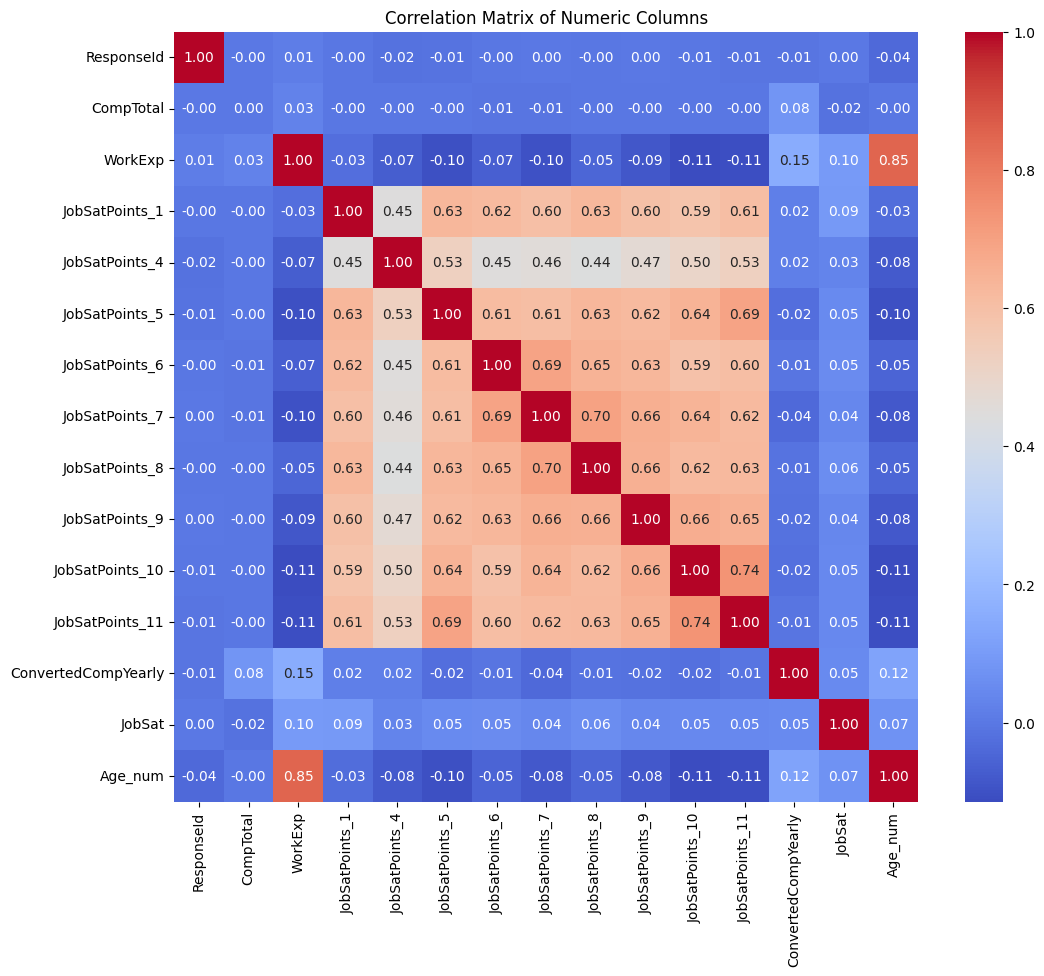

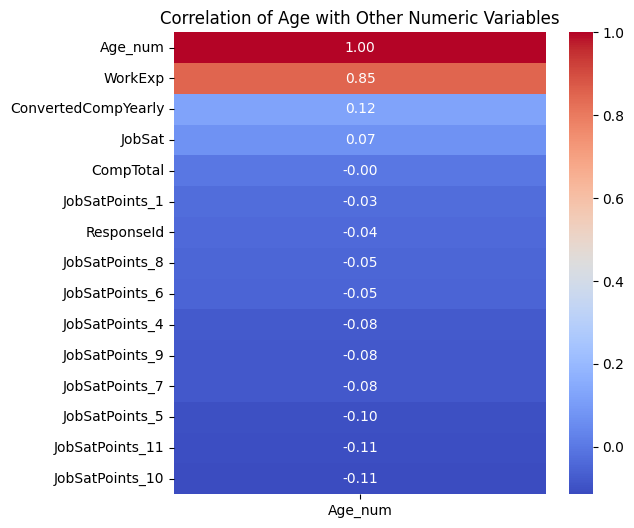

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Transform Age column to numeric
# -----------------------------
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 67.5,
    "Prefer not to say": np.nan
}

df["Age_num"] = df["Age"].map(age_map)

print("Transformed Age column:")
print(df["Age_num"].head())

# -----------------------------
# 2. Select numeric columns
# -----------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Ensure Age_num is included
if "Age_num" not in numeric_cols:
    numeric_cols.append("Age_num")

numeric_df = df[numeric_cols].copy()

print(f"\nNumeric columns considered for correlation ({len(numeric_cols)}):")
print(numeric_cols)

# -----------------------------
# 3. Compute Correlation Matrix
# -----------------------------
corr_matrix = numeric_df.corr(method="pearson")

# Correlation of Age_num with all other numeric columns
age_corr = corr_matrix["Age_num"].sort_values(ascending=False)
print("\nCorrelation of Age with other numeric columns:")
print(age_corr)

# -----------------------------
# 4. Visualize Correlation Matrix (all numeric variables)
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# -----------------------------
# 5. Visualize focused Age correlation
# -----------------------------
plt.figure(figsize=(6, len(numeric_cols)*0.4))
sns.heatmap(
    age_corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation of Age with Other Numeric Variables")
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
